**NAMA : AJI RIDWAN MAS <br>
NIM : 211351008 <br>
KELAS : PAGI A**

#Import dataset kaggle

In [68]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ajiridwanmas","key":"e3597cacf527a31b3afd9ec9772f42ec"}'}

In [69]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [71]:
!kaggle datasets download -d wenruliu/adult-income-dataset

adult-income-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [72]:
!unzip adult-income-dataset -d AID
!ls AID

Archive:  adult-income-dataset.zip
replace AID/adult.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: adult.csv


#Import library yang dibutuhkan

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import cross_val_score

In [76]:
data = pd.read_csv('/content/AID/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#Data Discovery

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [78]:
data.sample(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
47505,50,Federal-gov,111700,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,50,United-States,<=50K
1997,36,Local-gov,126569,Bachelors,13,Divorced,Other-service,Own-child,White,Male,0,0,40,United-States,<=50K
6390,57,State-gov,243033,Some-college,10,Widowed,Sales,Not-in-family,White,Female,0,0,40,United-States,<=50K
35852,60,Self-emp-not-inc,92845,5th-6th,3,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
26135,63,Private,100099,HS-grad,9,Married-spouse-absent,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [79]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#EDA

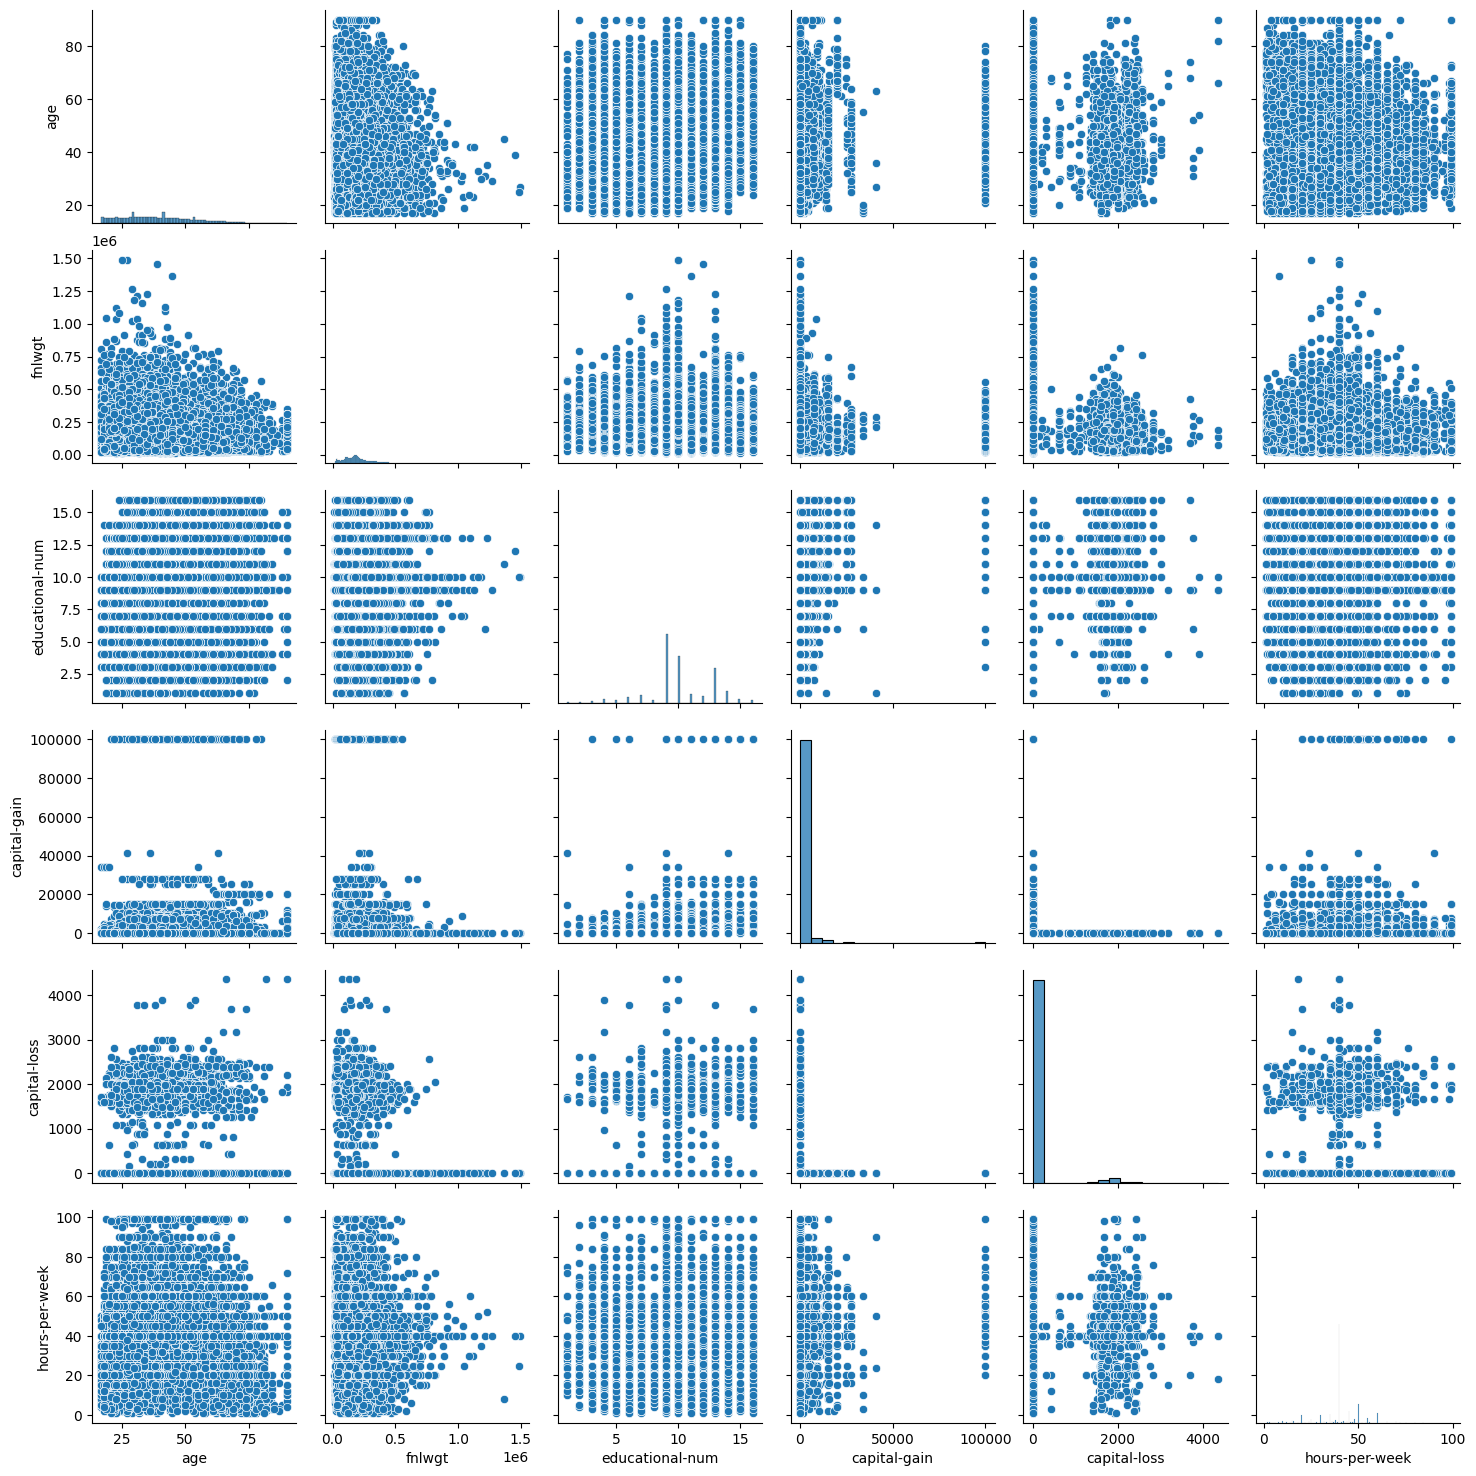

In [80]:
sns.pairplot(data)

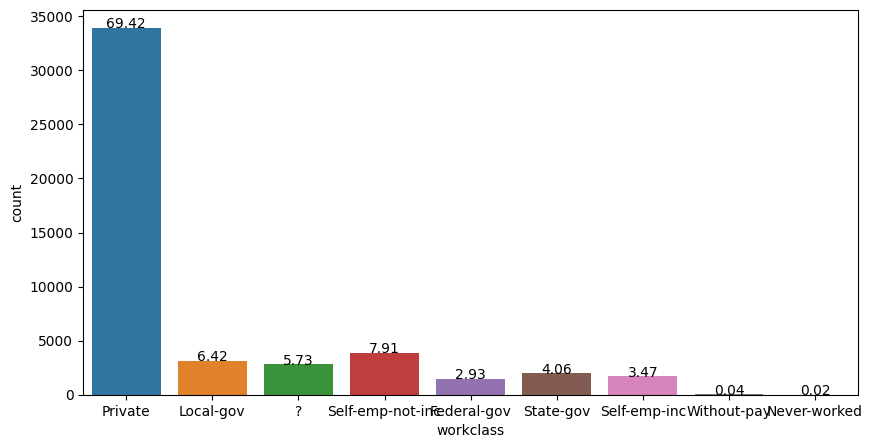

In [81]:
plt.figure(figsize=(10,5))

total = float(len(data['income']))

a = sns.countplot(x = 'workclass',data = data)

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

In [82]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [83]:
data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

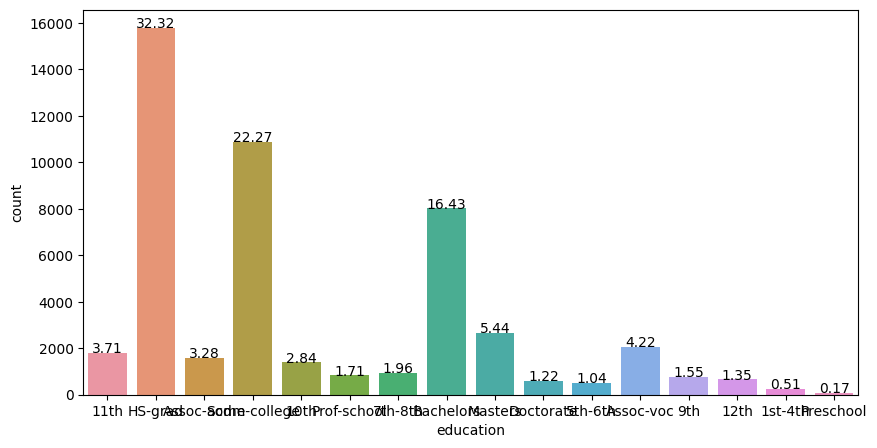

In [84]:
plt.figure(figsize=(10,5))

a = float(len(['income']))

a = sns.countplot(x='education',data = data)
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

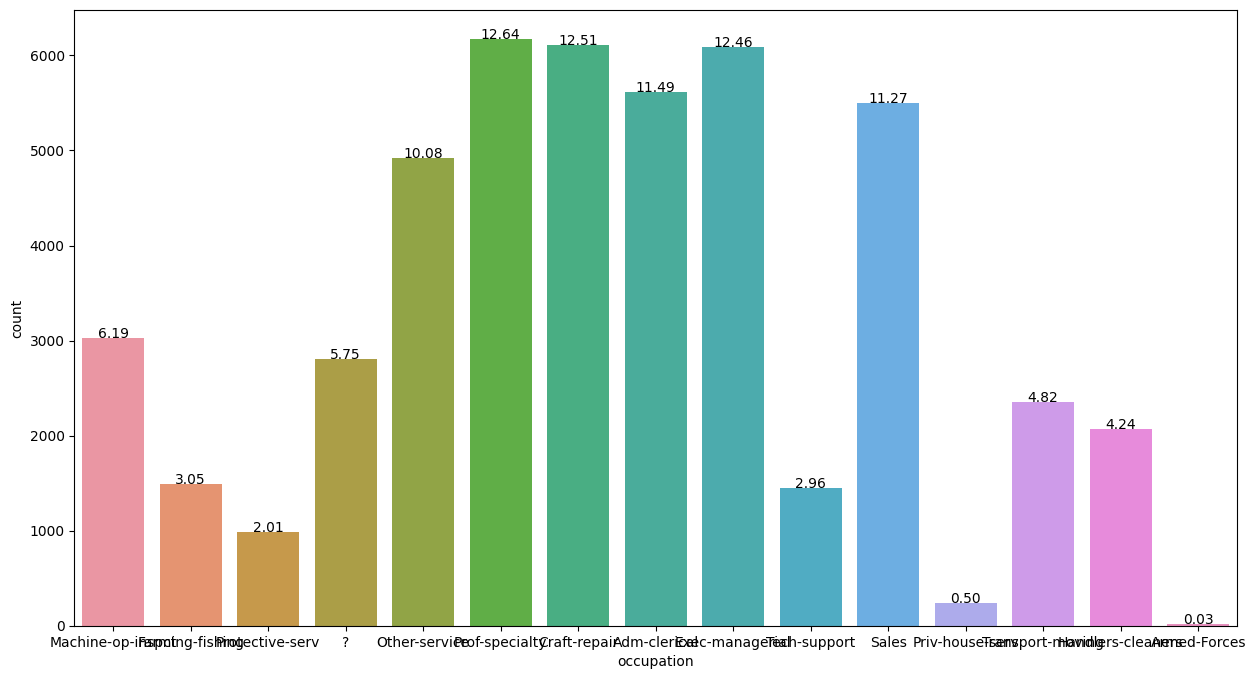

In [85]:
plt.figure(figsize=(15,8))
total = float(len(data) )

ax = sns.countplot(x = "occupation", data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

In [86]:
data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
       'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

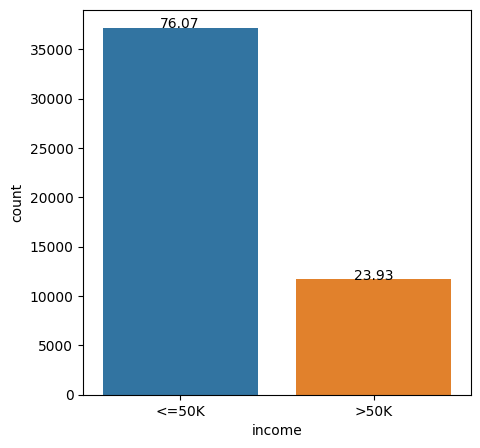

In [87]:
plt.figure(figsize=(5,5))
total = float(len(data) )

ax = sns.countplot(x = "income", data = data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center")
plt.show()

In [88]:
data['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

<ipython-input-89-e9f01dae5438>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')


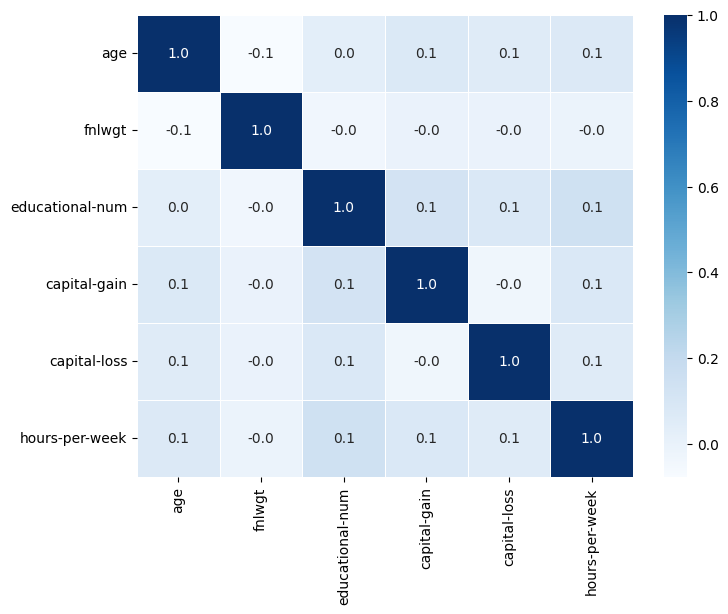

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data.corr(), annot = True, linewidths = .5, fmt = '.1f',ax = ax, cmap = 'Blues')
plt.show()

In [90]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#Data preparation

In [91]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [92]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [93]:
data.shape

(48842, 15)

In [94]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [95]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [96]:
data['native-country'].unique()

array(['United-States', '?', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [97]:
del data['fnlwgt']
del data['educational-num']
del data['race']
del data['capital-gain']
del data['capital-loss']

In [98]:
data.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [99]:
label_encoder = preprocessing.LabelEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['workclass'] = label_encoder.fit_transform(data['workclass'])
data['education'] = label_encoder.fit_transform(data['education'])
data['marital-status'] = label_encoder.fit_transform(data['marital-status'])
data['occupation'] = label_encoder.fit_transform(data['occupation'])
data['relationship'] = label_encoder.fit_transform(data['relationship'])
data['native-country'] = label_encoder.fit_transform(data['native-country'])
data['income'] = label_encoder.fit_transform(data['income'])

In [100]:
data['workclass'].unique()

array([4, 2, 0, 6, 1, 7, 5, 8, 3])

In [101]:
data.head()

,age,workclass,education,marital-status,occupation,relationship,gender,hours-per-week,native-country,income
0,25,4,1,4,7,3,1,40,39,0
1,38,4,11,2,5,0,1,50,39,0
2,28,2,7,2,11,0,1,40,39,1
3,44,4,15,2,7,0,1,40,39,1
4,18,0,15,4,0,3,0,30,39,0


In [102]:
x = data[['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'gender', 'hours-per-week', 'native-country']]
y = data['income']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [104]:
x.shape, y.shape

((48842, 9), (48842,))

In [105]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (34189, 9)
x_test:  (14653, 9)
y_train:  (34189,)
y_test:  (14653,)


#Modeling

In [106]:
knn = KNeighborsClassifier(n_neighbors=9)

In [107]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [108]:
predict = knn.predict(x_test)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [109]:
knn.score(x_test, y_test)*100

79.67651675424827

#Visualisasi hasil modeling

In [110]:
print('Accuracy Score: ', accuracy_score(y_test, predict))

Accuracy Score:  0.7967651675424827


In [111]:
print('Precision Score: ', precision_score(y_test, predict))

Precision Score:  0.5818008877615726


In [112]:
print('Recall Score: ', recall_score(y_test, predict))

Recall Score:  0.5251860331997711


In [113]:
print('F1 Score: ', f1_score(y_test, predict))

F1 Score:  0.5520457280385078


In [114]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     11159
           1       0.58      0.53      0.55      3494

    accuracy                           0.80     14653
   macro avg       0.72      0.70      0.71     14653
weighted avg       0.79      0.80      0.79     14653



In [115]:
cm = confusion_matrix(y_test, predict)
cm

array([[9840, 1319],
       [1659, 1835]])

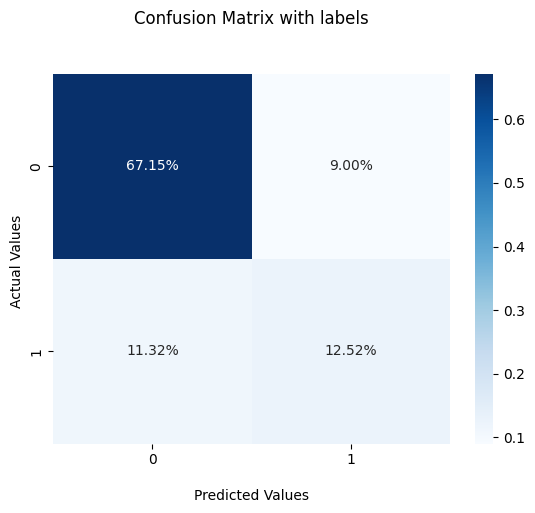

In [116]:
ax = sns.heatmap(cm/np.sum(cm), annot=True,  fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

plt.show()

In [117]:
accuracy_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x, y, cv=10)
    accuracy_rate.append(score.mean())

In [118]:
error_rate = []

for i in range(1,40):

    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn, x, y, cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

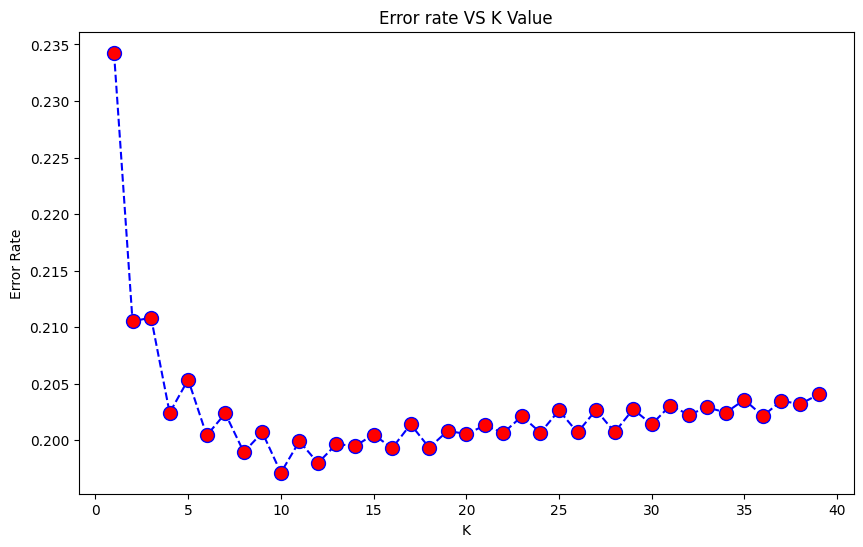

In [120]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

plt.title('Error rate VS K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [121]:
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K = 10')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K = 10


[[10163   996]
 [ 1891  1603]]


              precision    recall  f1-score   support

           0       0.84      0.91      0.88     11159
           1       0.62      0.46      0.53      3494

    accuracy                           0.80     14653
   macro avg       0.73      0.68      0.70     14653
weighted avg       0.79      0.80      0.79     14653



In [122]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('WITH K = 1')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

WITH K = 1


[[9329 1830]
 [1634 1860]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.84     11159
           1       0.50      0.53      0.52      3494

    accuracy                           0.76     14653
   macro avg       0.68      0.68      0.68     14653
weighted avg       0.77      0.76      0.77     14653



#Simpan model pickle

In [124]:
import pickle

filename = "AID.sav"
pickle.dump(knn,open(filename,'wb'))